**1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
variety = iris.target

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
print(iris.target_names)
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety**

In [ ]:
iris_df['variety'] = iris.target 
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
new_iris = iris_df.rename(columns={'sepal length (cm)': 'sepal_length', 'sepal width (cm)': 'sepal_width'})

In [ ]:
new_iris = new_iris[['sepal_length', 'sepal_width', 'variety']]
new_iris.head()

,sepal_length,sepal_width,variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


**3. Разделите данные на выборку для обучения и тестирования**

In [ ]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_iris, variety, test_size=0.25, random_state=42)

In [ ]:
len(y_test)

38

**4. Постройте модель LDA**

In [ ]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0])

In [ ]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [ ]:
result

,0,1
0,1,1
1,0,0
2,2,2
3,1,1
4,1,2
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


In [ ]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, lda.predict(X_test))  # модель делала некоторые ошибки, поэтому не единица

0.868421052631579

In [ ]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-5.83421967,  8.36880937,  0.        ],
       [ 1.5215595 , -3.81430503,  0.        ],
       [ 3.81202284, -3.79343242,  0.        ]])

**5. Визуализируйте предсказания для тестовой выборки и центры классов**

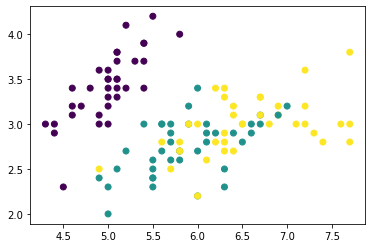

In [ ]:
# визуализируем дискриминантную линию 
plt.scatter(x=X_train['sepal_length'], y=X_train['sepal_width'], c=y_train)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

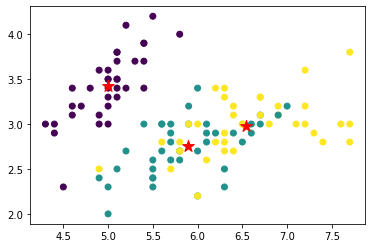

In [ ]:
# сам scatter plot
plt.scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='Accent_r',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

**6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width**

In [ ]:
iris_two = new_iris[['sepal_length', 'sepal_width']]
iris_two.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


**7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию**

In [ ]:
X = iris_two[['sepal_length', 'sepal_width']]

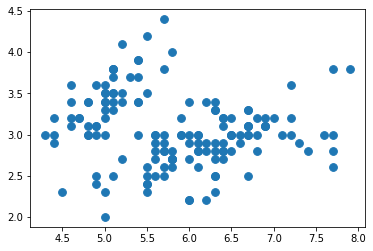

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], cmap='autumn', s=60)

In [ ]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112],
       [-0.53717756,  1.93979142],
       [-1.50652052,  0.78880759],
       [-1.02184904,  0.78880759],
       [-1.74885626, -0.36217625],
       [-1.14301691,  0.09821729],
       [-0.53717756,  1.47939788],
       [-1.26418478,  0.78880759],
       [-1.26418478, -0.13197948],
       [-1.87002413, -0.13197948],
       [-0.05250608,  2.16998818],
       [-0.17367395,  3.09077525],
       [-0.53717756,  1.93979142],
       [-0.90068117,  1.01900435],
       [-0.17367395,  1.70959465],
       [-0.90068117,  1.70959465],
       [-0.53717756,  0.78880759],
       [-0.90068117,  1.47939788],
       [-1.50652052,  1.24920112],
       [-0.90068117,  0.55861082],
       [-1.26418478,  0.78880759],
       [-1.02184904, -0.13197948],
       [-1.02184904,  0.78880759],
       [-0.7795133 ,  1.01900435],
       [-0.7795133 ,

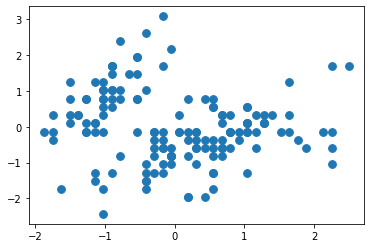

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# строим график локтя, определяем оптимальное количество кластеров

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

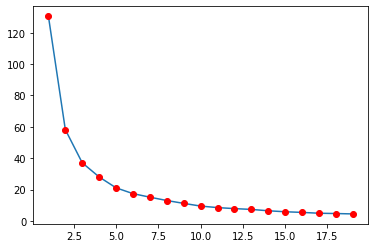

In [ ]:
plt.plot(ks, k_inertia)   # из графика видно, что оптимальное кол-во кластеров - 2 (сильное изменение инерции от 1 до 2х)
plt.plot(ks, k_inertia ,'ro')

In [ ]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

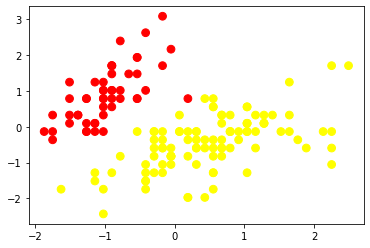

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)